<a href="https://colab.research.google.com/github/adolfmukama/MachineLearning4Genomics/blob/main/NLP_DSA_8501_PROJECT_(using_text_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading libraries for scraping twitter data
import pandas as pd
# import snscrape.modules.twitter as sntwitter
import itertools
import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pwd


/content


In [ ]:
df=pd.read_csv('tweets_exercise.csv',index_col=0)

In [ ]:
#reset author to a column
df = df.reset_index()

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.shape

(7613, 5)

In [ ]:
#displaying the last 5 tweets from the data
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
#inspecting a single row of the text column
df['text'][0:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

In [ ]:
#selecting columns of interest only
text_data=df[['id','text','target']]

In [136]:
df['text'][500:530]

500    Christian Attacked by Muslims at the Temple Mo...
501    @envw98 @NickCoCoFree @JulieDiCaro @jdabe80 Wh...
502    Kelly Osbourne attacked for racist Donald Trum...
503    @eunice_njoki aiii she needs to chill and answ...
504    Christian Attacked by Muslims at the Temple Mo...
505    Christian Attacked by Muslims at the Temple Mo...
506    Christian Attacked by Muslims at the Temple Mo...
507    I attacked Robot-lvl 19 and I've earned a tota...
508    Christian Attacked by Muslims at the Temple Mo...
509    @christinalavv @lindsay_wynn3 I just saw these...
510    Christian Attacked by Muslims at the Temple Mo...
511    Christian Attacked by Muslims at the Temple Mo...
512    Christian Attacked by Muslims at the Temple Mo...
513    TV program I saw said US air plane flew to ura...
514    Christian Attacked by Muslims at the Temple Mo...
515    @MageAvexis &lt; things. And what if we get at...
516    Christian Attacked by Muslims at the Temple Mo...
517    #WeLoveLA #NHLDucks Aval

In [ ]:
text_data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


## Text Cleaning

In [ ]:
# removing duplicates from the text column
text_data.drop_duplicates('text',keep='first')

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7604,10863,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,10864,on the flip side I'm at Walmart and there is a...,1
7606,10866,Suicide bomber kills 15 in Saudi security site...,1
7608,10869,Two giant cranes holding a bridge collapse int...,1


In [ ]:
text_data.shape

(7613, 3)

In [ ]:
#remove username and links
#def clean_text(text):
    #url_pattern = re.compile(r'https?://\S+|www\.\S+')
    #text = url_pattern.sub(r'', text)
    #return text.strip()
#remove username and links,hashtags and extra spaces
def clean_text(text):
    #remove links
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    #remove usernames
    username_pattern = re.compile(r'@\w+')
    text = username_pattern.sub(r'', text)
    # Remove hashtags
    hashtag_pattern = re.compile(r'#\w+')
    text = hashtag_pattern.sub(r'', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [124]:
text_data['Processed_text'] =text_data['text'].apply(clean_text)
text_data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive evacuation orders in Cal..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [ ]:
#remove links and urls
# def remove_usernames_links(content):
#     content=re.sub('http[^\s]+','',content)
#     return content


# text_data['Processed_Tweets'] =text_data['content'].apply(remove_usernames_links)
# text_data.head()

In [126]:
text_data['Processed_text'][0:4]

0    Our Deeds are the Reason of this May ALLAH For...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive evacuation orders in Cal...
Name: Processed_text, dtype: object

In [127]:
# remove punctuation from the text column
import string
import html
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [128]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
text_data['Processed_text']=text_data['Processed_text'].apply(lambda x: remove_punctuation(x))
text_data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive evacuation orders in Cali...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [130]:
text_data['Processed_text'][0:10]

0    Our Deeds are the Reason of this May ALLAH For...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3    13000 people receive evacuation orders in Cali...
4    Just got sent this photo from Ruby as smoke fr...
5    Update  California Hwy 20 closed in both direc...
6    Heavy rain causes flash flooding of streets in...
7    Im on top of the hill and I can see a fire in ...
8    Theres an emergency evacuation happening now i...
9     Im afraid that the tornado is coming to our area
Name: Processed_text, dtype: object

In [131]:
# remove numbers
def remove_numbers(Processed_text):
    Processed_text=re.sub(r'\d','',Processed_text)
    return Processed_text
text_data['Processed_text']=text_data['Processed_text'].apply(lambda x: remove_numbers(x))
text_data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in California
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [132]:
text_data['Processed_text'][0:10]

0    Our Deeds are the Reason of this May ALLAH For...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3       people receive evacuation orders in California
4    Just got sent this photo from Ruby as smoke fr...
5    Update  California Hwy  closed in both directi...
6    Heavy rain causes flash flooding of streets in...
7    Im on top of the hill and I can see a fire in ...
8    Theres an emergency evacuation happening now i...
9     Im afraid that the tornado is coming to our area
Name: Processed_text, dtype: object

In [133]:
for i in range (len(text_data['Processed_text'])):

    x = text_data['Processed_text'][i].replace("\n"," ").replace("\r"," ") #cleaning newline “\n” from the tweets
    text_data['Processed_text'][i] = html.unescape(x)

In [135]:
text_data['Processed_text'][0:10]

0    Our Deeds are the Reason of this May ALLAH For...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3       people receive evacuation orders in California
4    Just got sent this photo from Ruby as smoke fr...
5    Update  California Hwy  closed in both directi...
6    Heavy rain causes flash flooding of streets in...
7    Im on top of the hill and I can see a fire in ...
8    Theres an emergency evacuation happening now i...
9     Im afraid that the tornado is coming to our area
Name: Processed_text, dtype: object

In [137]:
#remove emojis
def deEmojify(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')
text_data['Processed_text']=text_data['Processed_text'].apply(lambda s:deEmojify(s))
text_data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this May ALLAH For...
1,4,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in California
4,7,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby as smoke fr...


In [139]:
text_data['Processed_text'][0:10]

0    Our Deeds are the Reason of this May ALLAH For...
1                Forest fire near La Ronge Sask Canada
2    All residents asked to shelter in place are be...
3       people receive evacuation orders in California
4    Just got sent this photo from Ruby as smoke fr...
5    Update  California Hwy  closed in both directi...
6    Heavy rain causes flash flooding of streets in...
7    Im on top of the hill and I can see a fire in ...
8    Theres an emergency evacuation happening now i...
9     Im afraid that the tornado is coming to our area
Name: Processed_text, dtype: object

In [140]:
#convert cleaned text to lower case
text_data['Processed_text']=text_data['Processed_text'].str.lower()
text_data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this may allah for...
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation orders in california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby as smoke fr...


In [141]:
df2=text_data['Processed_text']
df2.head()

0    our deeds are the reason of this may allah for...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3       people receive evacuation orders in california
4    just got sent this photo from ruby as smoke fr...
Name: Processed_text, dtype: object

In [ ]:
# df2.to_csv('ner_data.csv',index=False)

In [ ]:
# panda=pd.read_csv('ner_data.csv')
# panda=panda.dropna(how='all')

In [ ]:
# panda.tail()

In [142]:
# importing libraries for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
# from sklearn.feature_extraction.text import TfidfVectorizer
import os
import string

from wordcloud import WordCloud, STOPWORDS
lemmatizer=WordNetLemmatizer()
# %matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
eng_stop_words=list(stopwords.words('english'))

In [144]:
def Preprocessedtext(text):
    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize the tweet
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruct the tweet
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [145]:
text_data['Processed_text']=text_data['Processed_text'].apply(Preprocessedtext)

In [146]:
text_data['Processed_text'][0:10]

0                      deed reason may allah forgive u
1                forest fire near la ronge sask canada
2    resident asked shelter place notified officer ...
3           people receive evacuation order california
4               got sent photo ruby smoke pours school
5    update california hwy closed direction due lak...
6    heavy rain cause flash flooding street manitou...
7                            im top hill see fire wood
8    there emergency evacuation happening building ...
9                        im afraid tornado coming area
Name: Processed_text, dtype: object

## Analyzing Text statistics

<Axes: >

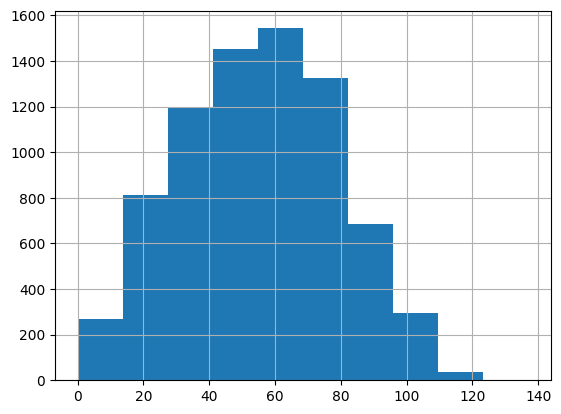

In [147]:
#number of characters present in each sentence
text_data['Processed_text'].str.len().hist()

- We can see that for the preprocessed tweets, the number of characters range approximately between 0 to 140.
- Majority of the sentences have 20-80 words.



In [148]:
# number of words appearing in each processed tweets
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

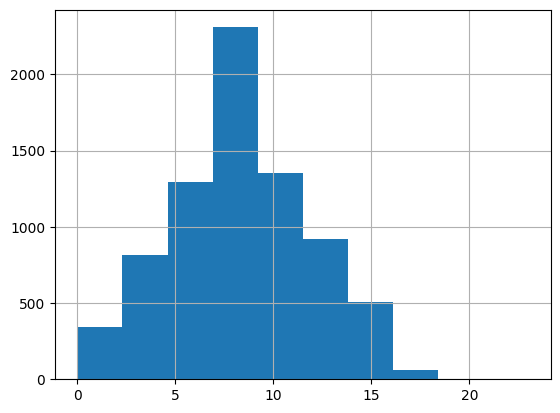

In [149]:
plot_word_number_histogram(text_data['Processed_text'])

- Number of words appearing in the processed tweets range between 2 to 20 words

In [150]:
import numpy as np

In [151]:
# Analyzing the stop words removed from the original tweets
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

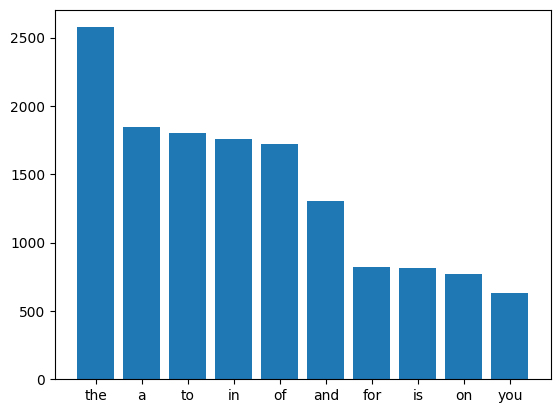

In [152]:
plot_top_stopwords_barchart(text_data['text'])

The most common stop word in the Text column was the, followed by to and a. The least in the top 10 common stop words is my.

In [153]:
#Top non stop words
import seaborn as sns
from collections import  Counter


In [154]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        #if (word not in stop):
            x.append(word)
            y.append(count)

    sns.barplot(x=y,y=x)

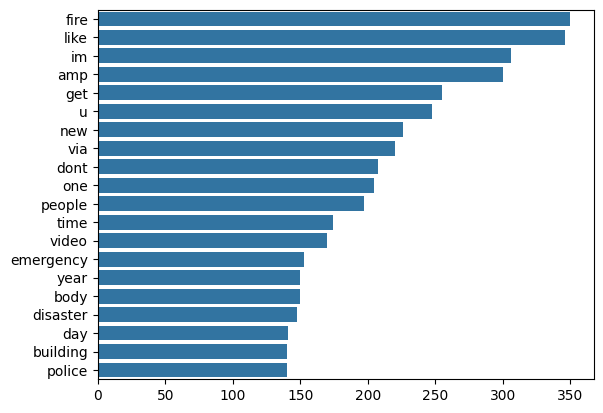

In [155]:
plot_top_non_stopwords_barchart(text_data['Processed_text'])

- From the bar graph, we can see the top non-stopwords are love,u, thank and new.

## Ngram exploration

In [156]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
def plot_top_ngrams_barchart(text, n=2):
    #stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

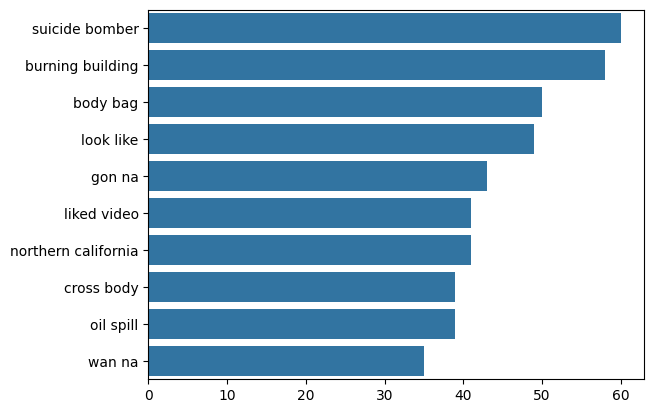

In [158]:
plot_top_ngrams_barchart(text_data['Processed_text'],2)

- Bigrams such as president obama,happy birthday,cant wait,last night dominate the processed tweets

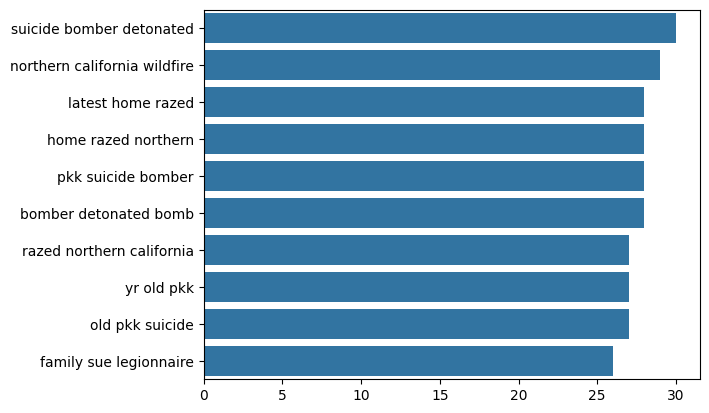

In [161]:
# top trigrams
plot_top_ngrams_barchart(text_data['Processed_text'],3)

From the plot, weekend hashtag project, cant wait see, hashtag game tweet etc., dominate the trigrams of processed tweets

## Word Cloud

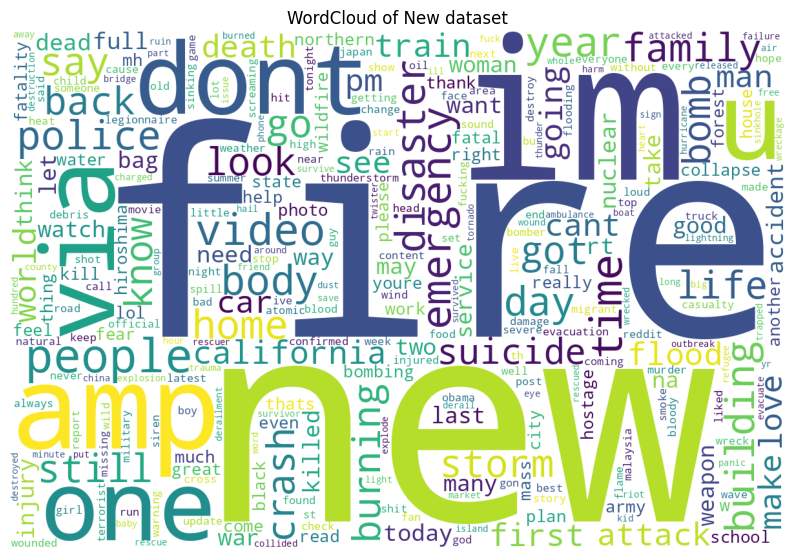

In [163]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(max_words=300, width=1200, height=800, background_color='white',
                        collocations=False).generate(" ".join(text_data['Processed_text']))
plt.grid(None)
plt.title("WordCloud of New dataset")
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud_new.png')

In [164]:
# save data into csv format
text_data.to_csv('usceleb_text.csv',index=False)

In [165]:
data=pd.read_csv('usceleb_text.csv')

In [166]:
data.head()

,id,text,target,Processed_text
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed reason may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive evacuation order california
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby smoke pours school


In [168]:
#top 10 tweet locations
top_tweet_shares=data.target.value_counts().sort_values(ascending=False).head(10)
top_tweet_shares

target
0    4342
1    3271
Name: count, dtype: int64

In [171]:
top_username=data.target.value_counts().head(20)
top_username

target
0    4342
1    3271
Name: count, dtype: int64

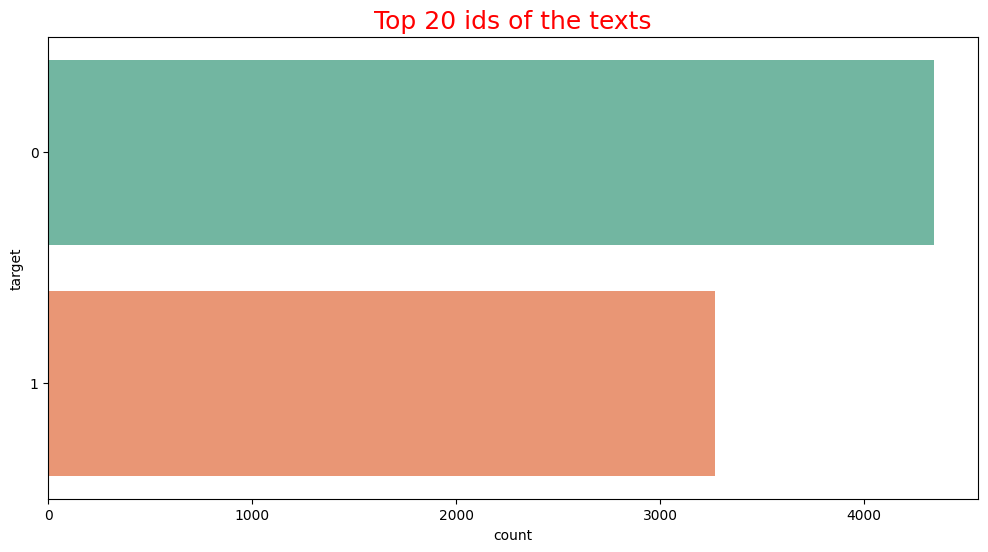

In [172]:
#visualizing the top tweeters from kenya
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Top 20 ids of the texts",fontsize=18,color='Red')
sns.barplot(y=top_username.index,x=top_username,palette='Set2',orient='h')
plt.savefig('top_20_us.png')

## TOPIC MODELLING USING LATENT DIRCHLET ALLOCATION (LDA)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'de', 'use','e','nm','tx','nz','u','im','i','I','th','gma'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data_n = data.Processed_Tweets.values.tolist()
data_words = list(sent_to_words(data_n))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

In [ ]:
data_words[1]

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]



In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word,
                              mds="mds",R=30)
vis

## SENTIMENT ANALYSIS

In [ ]:
#!pip install better_profanity
#!pip install textblob

In [173]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [174]:
list1 = []
for i in data['Processed_text']:
    list1.append((sentiments.polarity_scores(str(i)))['compound'])

In [175]:
data['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

data['sentiment_category'] = data['sentiment'].apply(sentiment_category)

In [176]:
data.tail()
data['sentiment_category'][0:10]

0    positive
1    negative
2     neutral
3     neutral
4     neutral
5    negative
6     neutral
7    negative
8    negative
9     neutral
Name: sentiment_category, dtype: object

In [177]:
data['sentiment_category'].value_counts()

sentiment_category
negative    3803
positive    1938
neutral     1872
Name: count, dtype: int64

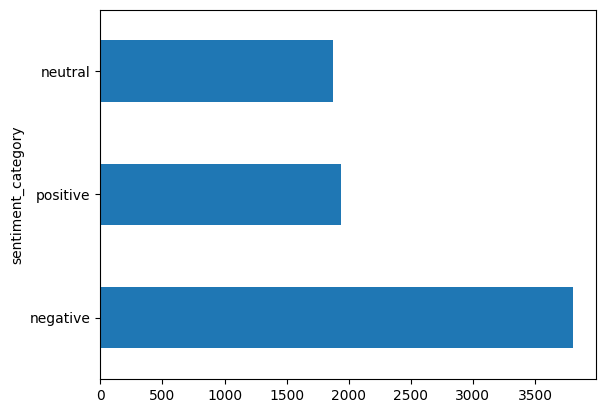

In [178]:
# visualizing the sentiments
data['sentiment_category'].value_counts().plot(kind='barh')
plt.savefig('sentiment.png')

In [180]:
#inspecting positively classified sentiments
data[data['sentiment_category']=='positive']['text'].head()

0     Our Deeds are the Reason of this #earthquake M...
11    Haha South Tampa is getting flooded hah- WAIT ...
16                                        I love fruits
17                                     Summer is lovely
21                                    London is cool ;)
Name: text, dtype: object

In [181]:
# inspecting negatively classified sentiments
data[data['sentiment_category']=='negative']['text'].head()

1                Forest fire near La Ronge Sask. Canada
5     #RockyFire Update => California Hwy. 20 closed...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
10          Three people died from the heat wave so far
Name: text, dtype: object

In [182]:
#inspecting neutrally classified sentiments
data[data['sentiment_category']=='neutral']['text'].head()

2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
6    #flood #disaster Heavy rain causes flash flood...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

## Named Entity Recognition (NER)

In [189]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp=spacy.load("en_core_web_sm")
nlp.max_length = 1700000
#get the pipeline component
ner=nlp.get_pipe("ner")

In [190]:
data['Processed_text'].iloc[1000]

'drake straight body bagging meek ovo stage'

In [192]:
#sample tag text
txt=data['Processed_text'].iloc[1000]
doc=nlp(txt)

In [193]:
def spacy_large_ner(document):

    return {(ent.text.strip(), ent.label_) for ent in nlp(document).ents}
spacy_large_ner(txt)

{('meek', 'PERSON')}

In [194]:
## display result
spacy.displacy.render(doc,style='ent')

In [195]:
#named_entity_bar_chart
def plot_named_entity_barchart(text):
    #nlp = spacy.load("en_core_web_sm")

    def _get_ner(text):
        doc=nlp(text)
        #return {(ent.text.strip(), ent.label_) for ent in nlp(text).ents}
        return [X.label_ for X in doc.ents]

    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()

    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

In [199]:
plot_named_entity_barchart(data['Processed_text'])

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>

PERSON,GPE and ORG dominate the entity bar chart

In [ ]:
def plot_most_common_named_entity_barchart(text, entity=""):
    #nlp = spacy.load("en_core_web_sm")

    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]

    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(y,x).set_title(entity)

In [ ]:
plot_most_common_named_entity_barchart(data['Processed_Tweets'],entity='GPE')

In [ ]:
# creating tokens that will serve as entities for Spacy
tokens = nlp(''.join(str(panda['Processed_Tweets'].tolist())))

In [ ]:
# extracting the entities
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

In [ ]:
#extracting the location (GPE)
location_list=[]
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        location_list.append(ent.text)
location_counts = Counter(location_list).most_common()
df_location = pd.DataFrame(location_counts, columns =['country','count'])

In [ ]:
df_location.head(10)

In [ ]:
#df_location.plot.barh(x='country', y='count', title="NER for different locations", figsize=(10,8)).invert_yaxis()

In [ ]:
# Extracting longitudes and Latitudes
#df_location.to_csv('location.csv',index=False)

In [ ]:
df1=pd.read_csv('location.csv')

In [ ]:
df1.head()

In [ ]:
#!pip install geopy
#!pip install geopandas

In [ ]:
from geopandas.tools import geocode

In [ ]:
for index,row in df1.iterrows():
    try:
        print(row['country'])
        information=geocode(row['country'],provider='nominatim',user_agent='xyz',timeout=5)
        df1.loc[index,'longitude']=information.geometry.loc[0].x
        df1.loc[index,'latitude']=information.geometry.loc[0].y
    except TypeError:
        print('Coordinates of' +row['country']+'are not available')


In [ ]:
df1.head()

In [ ]:
#save the df1 to a new csv format
df1.to_csv('location_geo.csv',index=False)

In [ ]:
#df2=pd.read_csv('location_geo.csv')

## A world map showing location of fall armyworms from different tweets

In [ ]:

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df2 = pd.read_csv("location_geo.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)

#a world map with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 8)), marker='o', color='red', markersize=15);
plt.savefig('fallarmyworm_geomap.png')